### Understanding the dataset 

The dataset contains medical insurance information for 1,338 individuals. It includes demographic and lifestyle attributes such as age gender, body mass index (BMI), number of children, smoking status, and region. The target variable, charges, represents the medical insurance cost billed to each individual.

This dataset is designed to help analyze how personal health and lifestyle factors influence healthcare expenses. It allows us to identify cost-driving patterns—such as the impact of smoking or high BMI—and build regression models to predict medical insurance charges based on these attributes.

The dataset is clean, structured, and suitable for supervised machine learning, particularly regression analysis.

`Points we get from the data`

- Distribution of data is right skewed 
- log transformation is helpful in this case 
- Smoker feature is most important 
- Outliers are likely associated with smokers.
- Many high-value outliers exist above 34k.
- People who smoke they get affected by age too so we can consider age too 
- Region isn't much effective feature bcz in every category in region the number of peoples almost as normal 
- sex is also not too much bias every category has almost same number of peoples 

In [27]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px 

In [3]:
df = pd.read_csv(r"D:\ML Projects\CareCost Analytics\insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Checking the distribution of charge

In [11]:
px.histogram(
df,
x= 'charges',
nbins=40,
title="Distribution of Medical Charges",
)

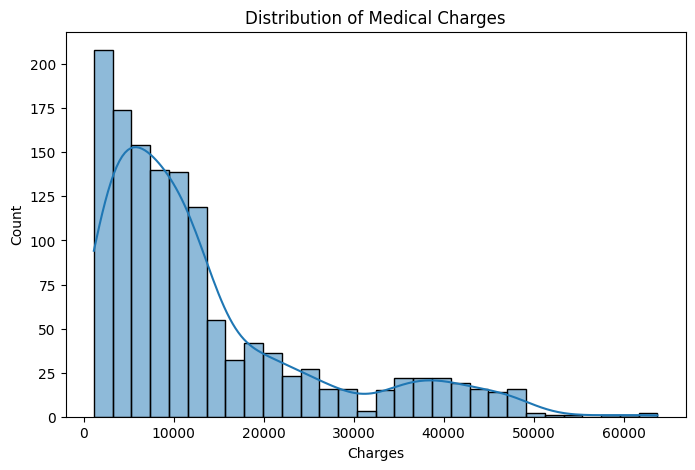

In [19]:
plt.figure(figsize=(8,5))

sns.histplot(
    df["charges"],
    bins=30,
    kde=True
)

plt.title("Distribution of Medical Charges")
plt.xlabel("Charges")
plt.ylabel("Count")

plt.show()


In [33]:
df['charges'].skew()

## this is showing that data is higly right skewed and in future we can do log transformation

np.float64(1.5158796580240388)

### Checking Outliers

In [32]:
fig = px.box(
  df, 
  x = 'charges',
  title = "checking Outliers for charges"
)

fig.show()


## Bivariate analysis 

### Smoker vs charges - BoxPlot

In [12]:
fig = px.box(
    df,
    x="smoker",
    y="charges",
    color="smoker",
    title="Smoker vs Medical Charges"
)

fig.show()

### Region vs charges

In [28]:
fig = px.box(
    df,
    x="region",
    y="charges",
    color="smoker",
    title="region vs Medical Charges"
)

fig.show()

### Sex vs Charges 

In [30]:
fig = px.box(
  df, 
  x = 'sex',
  y = 'charges',
  color = 'smoker',
  title="Sex vs Medical Charges"
)

fig.show()

### Age vs Charges 

In [20]:
fig = px.scatter(
    df,
    x="age",
    y="charges",
    color="smoker",
    title="Age vs Charges",
    trendline="ols"  
)

fig.show()


### BMI vs Charges

In [14]:
fig = px.scatter(
    df,
    x="bmi",
    y="charges",
    color="smoker",
    title="Age vs Charges",
    trendline="ols"   # adds regression line
)

fig.show()


## Correlation Heatmap

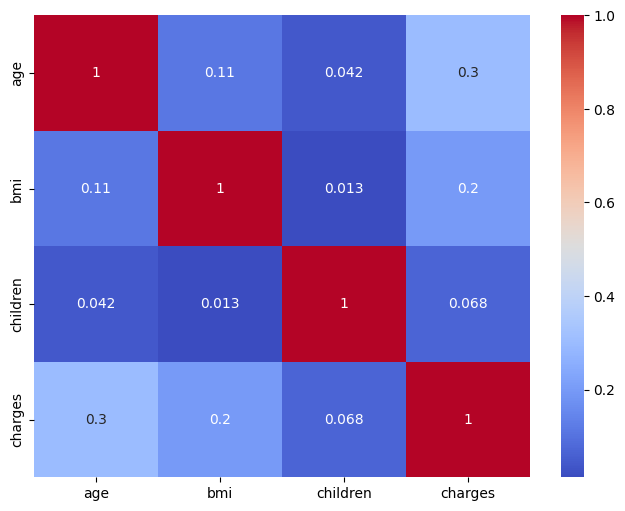

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()
